# <center> Python pour les TP/TIPE : Représenter un champ de vecteurs </center>

***

**1)** Représenter un champ de vecteurs avec Quiver


**2)** Représenter la dynamique d'un système grâce à un portrait de phase


**3)** Représenter la dynamique d'un système avec Quiver

***

**Chargement des bibliothèques**

In [1]:
# Pour avoir les graphiques qui s'affichent sous le code
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate as scpi

# Pour avoir une écriture jolie dans les graphiques
plt.rc('mathtext', fontset="cm")  

***

## **1) Représenter un champ de vecteurs avec Quiver **

***

On souhaite représenter un champ de vecteurs, par exemple le champ électrique d'un charge ponctuelle. Pour cela on l'écrit en coordonnées cartésiennes :

$$ \left \lbrace \begin{eqnarray}
E_x & = & \frac{Q}{4\, \pi\, \varepsilon_0\, (x^2 + y^2)}\, \frac{x}{\sqrt{x^2 + y^2}} \\[4mm]
E_y & = & \frac{Q}{4\, \pi\, \varepsilon_0\, (x^2 + y^2)}\, \frac{y}{\sqrt{x^2 + y^2}}
\end{eqnarray}
\right.
$$

On utilise pour cela **np.meshgrid** qui crée une grille de points $(x,\, y)$, et on définit le champ électrique en tout point de cette grille.

In [2]:
x = np.linspace(-4.5, 4.5, 10)
y = np.linspace(-4.5, 4.5, 10)

xx, yy = np.meshgrid(x, y)

Ex = xx / (xx**2 + yy**2)**(3/2.)
Ey = yy / (xx**2 + yy**2)**(3/2.)

Pour que le tracé du champ soit joli, on normalise les vecteurs :

$$ E_x \rightarrow \frac{E_x}{\sqrt{E_x^2 + E_y^2}} \qquad \text{et} \qquad E_y \rightarrow \frac{E_y}{\sqrt{E_x^2 + E_y^2}} $$

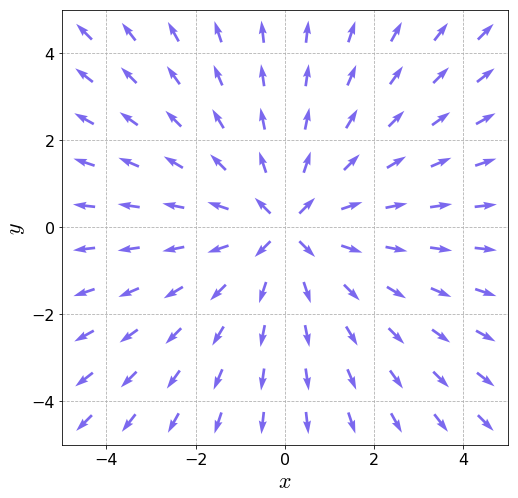

In [3]:
plt.figure(figsize=(8,8))
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dashed')
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$y$", fontsize=22)
plt.quiver(x, y, Ex / np.sqrt(Ex**2 + Ey**2), Ey / np.sqrt(Ex**2 + Ey**2), scale=20, pivot='mid', color='mediumslateblue')
plt.show()

***

## **2) Représenter la dynamique d'un système **

***

On définit le système d'équations d'un oscillateur harmonique :

$$ \ddot{x} + \omega^2\, x = 0 $$

soit

$$ \left \lbrace \begin{eqnarray}
\dot{x} & = & y \\
\dot{y} & = & - \omega^2\, x
\end{eqnarray}
\right.
$$

In [4]:
t = np.linspace(0.0,10.0,100)

omega = 1.

def eq(z, u) :
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = - omega**2 * x
    return [dxdt, dydt]

On résout le système numériquement avec odeint pour $x(0) = 3$ et $\dot{x}(0) = 0$, puis on extrait $x(t)$ et $\dot{x}(t)$.

In [5]:
z = scpi.odeint(eq,[3,0],t)

x = z[:,0]
y = z[:,1]

Et on trace $x(t)$.

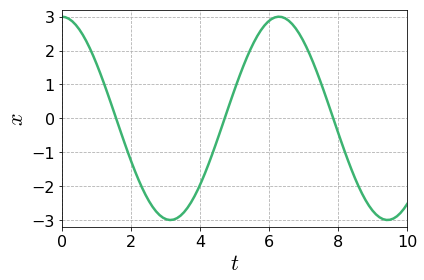

In [6]:
plt.xlim([0.,10.])
plt.ylim([-3.2,3.2])
plt.grid(linestyle='dashed')
plt.xlabel(r"$t$", fontsize=22)
plt.ylabel(r"$x$", fontsize=22)
plt.plot(t, x, color='mediumseagreen', linewidth=2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

Puis le portrait de phase.

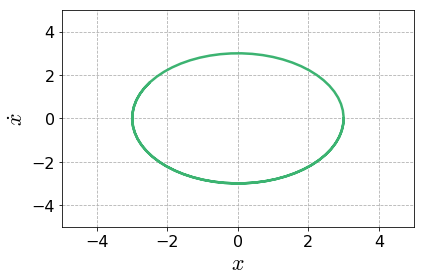

In [7]:
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(linestyle='dashed')
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$\dot{x}$", fontsize=22)
plt.plot(x, y, color='mediumseagreen', linewidth=2.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

***

## **3) Représenter la dynamique d'un système avec Quiver **

***

On peut améliorer ce portrait de phase en rajoutant le champ de la dynamique de $(x,\, \dot{x})$, c'est-à-dire

$$(\dot{x},\, \ddot{x}) = (\dot{x}, -\omega^2\, x)$$

en chaque point du graphique avec **plt.quiver**.

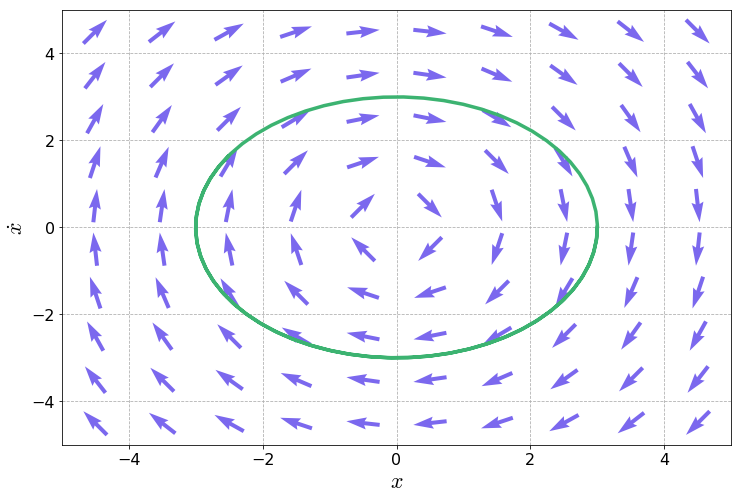

In [8]:
plt.figure(figsize=(12,8))
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dashed')
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$\dot{x}$", fontsize=22)
xXx = np.linspace(-4.5, 4.5, 10)
yYy = np.linspace(-4.5, 4.5, 10)
xx, yy = np.meshgrid(xXx, yYy)
U = yy
V = - omega**2 * xx
plt.quiver(xXx, yYy, U / np.sqrt(U**2 + V**2), V / np.sqrt(U**2 + V**2), scale=20, pivot='mid', color='mediumslateblue')
plt.plot(x, y, color='mediumseagreen', linewidth=3.5)
plt.show()